### 👋 Project: Analysis and Visualization of Sales Data Over Time

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregar os dados
data_path = 'dataset.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,Date,Sales
0,2013-01,113
1,2013-02,119
2,2013-03,134
3,2013-04,129
4,2013-05,121


In [4]:
# Ajustar tipo da coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Extrair ano e mês
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [6]:
# Features e label
features = ['Year', 'Month']
label = 'Sales'

In [7]:
# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[label], test_size=0.3, random_state=42
)

In [8]:
pipeline_df = Pipeline(steps=[
    ('transformer', ColumnTransformer([
        ('scaler', StandardScaler(), features)
    ], remainder='passthrough')),
    ('regressor', LinearRegression())
])

In [9]:
# Treinar modelo
pipeline_df.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Year', 'Month'])])),
                ('regressor', LinearRegression())])

In [10]:
# Fazer previsões
predictions = pipeline_df.predict(X_test)

In [11]:
# Avaliar modelo
rmse = root_mean_squared_error(y_test, predictions)
#rmse = mean_squared_error(y_test, predictions, squared=False)
print("\nRoot Mean Squared Error (RMSE) nos Dados de Teste = {:.4f}".format(rmse))


Root Mean Squared Error (RMSE) nos Dados de Teste = 43.5041


In [12]:
# Mostrar previsões (equivalente ao select('Date', 'Sales', 'prediction'))
resultado_df = pd.DataFrame({
    'Date': df.loc[X_test.index, 'Date'],
    'Sales': y_test,
    'Prediction': predictions
})

print("\nAmostra de previsões:")
print(resultado_df.head(10))


Amostra de previsões:
          Date  Sales  Prediction
117 2022-10-01    359  405.908424
19  2014-08-01    170  137.521567
82  2019-11-01    237  308.715431
97  2021-02-01    301  357.072291
56  2017-09-01    237  238.659792
12  2014-01-01    115  123.713253
132 2024-01-01    417  454.265284
65  2018-06-01    264  265.797147
66  2018-07-01    302  267.769763
18  2014-07-01    170  135.548951


#### Deploy com novos dados

In [13]:
# Criar DataFrame com as datas futuras
dates = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06']
novas_datas = pd.DataFrame({'Date': pd.to_datetime(dates, format='%Y-%m')})

In [14]:
# Extrair Year e Month
novas_datas['Year'] = novas_datas['Date'].dt.year
novas_datas['Month'] = novas_datas['Date'].dt.month

In [15]:
# Fazer previsões
X_novos = novas_datas[['Year', 'Month']]
predictions = pipeline_df.predict(X_novos)

In [16]:
# Adicionar previsões ao DataFrame
novas_datas['Prediction'] = predictions

In [17]:
# Exibir resultado
print("\nPrevisões para as novas datas:")
print(novas_datas[['Date', 'Prediction']])


Previsões para as novas datas:
        Date  Prediction
0 2025-01-01  487.320487
1 2025-02-01  489.293103
2 2025-03-01  491.265719
3 2025-04-01  493.238335
4 2025-05-01  495.210951
5 2025-06-01  497.183568


In [18]:
# Salvar em CSV
novas_datas[['Date', 'Prediction']].to_csv('previsoesdeploy.csv', index=False)
print("\nArquivo previsoesdeploy.csv salvo com sucesso.")


Arquivo previsoesdeploy.csv salvo com sucesso.


#### Visualização

In [19]:
# Carrega os dados do CSV para um DataFrame
dados = pd.read_csv('previsoesdeploy.csv')

In [20]:
# Converte a coluna 'Date' para datetime para melhor manipulação
dados['Date'] = pd.to_datetime(dados['Date'])

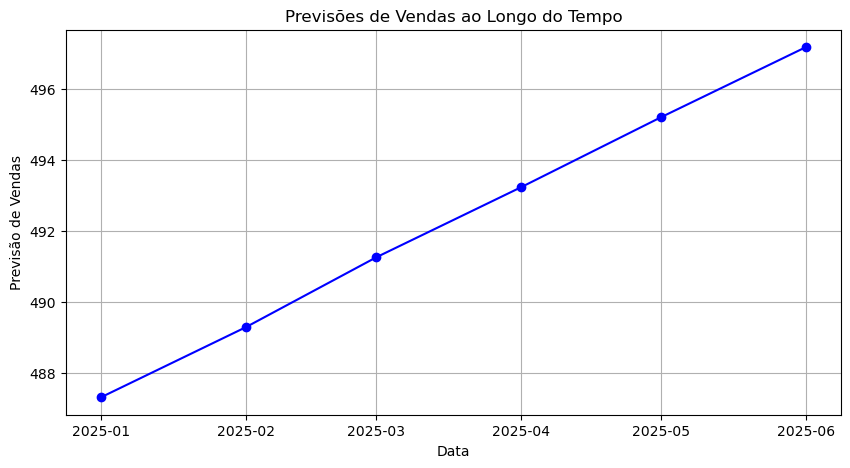

In [21]:
# Cria um gráfico de linhas
plt.figure(figsize=(10, 5))
plt.plot(dados['Date'], dados['Prediction'], marker='o', linestyle='-', color='b')
plt.title('Previsões de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Previsão de Vendas')
plt.grid(True)
plt.show()

In [23]:
# Salva o gráfico como uma imagem PNG
plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>